In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import math

In [33]:
def pre_processamento():
    xlsx = pd.ExcelFile('casos_corona.xlsx')
    df = pd.read_excel(xlsx, 'casos_corona')
    df = df[:100] ################################limitando o dataset
    df = df[['bairroPaciente','municipioPaciente','resultadoFinalExame','sexoPaciente', 'idadePaciente']]
    
    novo_df = []
    for i in range(len(df)):
        if(df.loc[i][2] == 'Positivo'):
            resultado = 1
            novo_df.append([df.loc[i][0], df.loc[i][1], resultado, df.loc[i][3], df.loc[i][4]])
        else:
            resultado = 0
            novo_df.append([df.loc[i][0], df.loc[i][1], resultado, df.loc[i][3], df.loc[i][4]])
    
    novo_df = pd.DataFrame(novo_df)
    novo_df.rename(columns={0: 'bairro_paciente', 1: 'municipio_paciente', 2: 'resultado_exame', 3: 'sexo_paciente', 4: 'idade_paciente'}, inplace=True)    
    return novo_df

In [34]:
df = pre_processamento()
df

,bairro_paciente,municipio_paciente,resultado_exame,sexo_paciente,idade_paciente
0,VILA PERI,FORTALEZA,0,MASCULINO,74.0
1,VARJOTA,FORTALEZA,0,FEMININO,31.0
2,NOVA METROPOLE JUREMA,CAUCAIA,0,FEMININO,84.0
3,PARQUE POTIRA JUREMA,CAUCAIA,0,FEMININO,61.0
4,PINHEIRO,GUAIÚBA,0,MASCULINO,37.0
...,...,...,...,...,...
95,PLANALTO,CASCAVEL,0,MASCULINO,6.0
96,CENTRO,ITAREMA,0,MASCULINO,36.0
97,MONTE,CANINDE,1,MASCULINO,21.0
98,SAO VICENTE,INDEPENDENCIA,0,FEMININO,38.0


# Consulta por bairros

In [35]:
def agrupar_bairros(df):
    bairros = pd.unique(df['bairro_paciente'])
    casos_bairros = []
    for bairro in bairros:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][0] == bairro):
                count = count + 1
        casos_bairros.append([bairro, count])
    casos_bairros = pd.DataFrame(casos_bairros)
    casos_bairros.rename(columns={0: 'bairro', 1: 'count'}, inplace=True)
    ordem = np.arange(1,len(casos_bairros)+1)
    casos_bairros['ordem'] = pd.Series(ordem, index=casos_bairros.index)
    return casos_bairros

In [36]:
dataset_bairros = agrupar_bairros(df)

In [37]:
def top_k_bairros(dataset, k):
    copia = dataset.copy()
    output = []
    for i in range(k):
        indice = copia['count'].idxmax()
        output.append([copia.loc[indice][0], copia.loc[indice][1]])
        copia.drop(indice, inplace=True,axis=0)
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'bairro', 1: 'count'})
    return output

In [38]:
top_k_bairros(dataset_bairros, 10)

,bairro,count
0,CENTRO,19
1,JUREMA,2
2,MESSEJANA,2
3,PIRAJA,2
4,ZONA RURAL,2
5,ARATURI,2
6,VILA PERI,1
7,VARJOTA,1
8,NOVA METROPOLE JUREMA,1
9,PARQUE POTIRA JUREMA,1


# Consulta por idade

In [100]:
def agrupar_idade(df):
    clusters_idades = []
    intervalos = np.arange(1, 100, dtype=int)
    for i in range(0, 95, 5):
        gaps = []
        for j in range(i, i+5):
            gaps.append(intervalos[j])
        clusters_idades.append(gaps)

    casos_idade = []

    for cluster in clusters_idades:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][4] in cluster):
                count = count + 1
        casos_idade.append(['[{}:{}]'.format(cluster[0], cluster[4]), count])
    casos_idade = pd.DataFrame(casos_idade)
    casos_idade.rename(columns={0: 'idade', 1: 'count'}, inplace=True)
    ordem = np.arange(1,len(casos_idade)+1)
    casos_idade['ordem'] = pd.Series(ordem, index=casos_idade.index)
    return casos_idade

In [101]:
dataset_idade = agrupar_idade(df)

In [103]:
def top_k_idade(dataset, k):
    copia = dataset.copy()
    output = []
    for i in range(k):
        indice = copia['count'].idxmax()
        output.append([copia.loc[indice][0], copia.loc[indice][1]])
        copia.drop(indice, inplace=True,axis=0)
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'idade', 1: 'count'})
    return output

In [104]:
top_k_idade(dataset_idade, 10)

,idade,count
0,[36:40],16
1,[26:30],14
2,[31:35],11
3,[41:45],8
4,[61:65],8
5,[46:50],7
6,[21:25],6
7,[51:55],6
8,[76:80],5
9,[71:75],4


# Consulta por gênero

In [44]:
def agrupar_genero(df): 
    generos = pd.unique(df['sexo_paciente'])
    casos_genero = []
    for genero in generos:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][3] == genero):
                count = count + 1
        casos_genero.append([genero, count])
    casos_genero = pd.DataFrame(casos_genero)
    casos_genero.rename(columns={0: 'genero', 1: 'count'}, inplace=True)
    ordem = np.arange(1,len(casos_genero)+1)
    casos_genero['ordem'] = pd.Series(ordem, index=casos_genero.index)
    return casos_genero

In [45]:
dataset_genero = agrupar_genero(df)
dataset_genero

,genero,count,ordem
0,MASCULINO,50,1
1,FEMININO,50,2


# Ruído de Laplace

In [106]:
def score_function_lap(registro, saida):
    if(registro[0] == saida):
        return -registro[2]
    else:
        return 0

In [107]:
def sensibilidade_lap(dataset):
    return 1

In [274]:
def erros_lap(query, argumento_consulta, k):
    erros_laplace = []
    top = list(query)
    for argumento in argumento_consulta:
        erro_argumento_lap = [0]*10
        for i in range(len(argumento)):
            if(argumento[i] == top[i]):
                erro = 0
            else:
                erro = abs(top.index(argumento[i]) - i)
            erro_argumento_lap[i]  = erro
        erros_laplace.append(erro_argumento_lap)
    return erros_laplace

In [309]:
def plot_erros(erros_argumento, k):
    df = pd.DataFrame({
        'epsilon': ['0.1', '1', '10'],
        'erro': erros_argumento,
        'k = %i'%(k): k})
    return df.plot(kind='bar', x='epsilon')

### Consulta Bairros com Ruído

In [369]:
def laplace_bairros(budget, sensibilidade, query, dataset, k):
    resposta_query = np.array(query['count'])
    coluna_bairros = np.array(query['bairro'])
    output = []
    np.random.seed(123)
    for i in range(k):
        ruido = stats.laplace.rvs(loc = 0, scale = sensibilidade/budget)
        output.append((resposta_query[i] + ruido))
    output = {
        'bairro': coluna_bairros,
        'count': output
    }
    
    df = pd.DataFrame(output, columns = ['bairro', 'count'])
    return df.sort_values(by=['count'],ascending=False)

In [381]:
budgets = [0.1, 1, 10]
k = 10
bairros = []
for budget in budgets:
    a = laplace_bairros(budget, sensibilidade_exp(dataset_bairros), top_k_bairros(dataset_bairros, k), dataset_bairros, k)
    a = np.array(a)
    print("epsilon: {}\ntop-{}:\n{}\n\n".format(budget, k, a))
    bairros.append(a[:,0])

epsilon: 0.1
top-10:
[['VILA PERI' 33.57834888254776]
 ['CENTRO' 23.9912496292116]
 ['ZONA RURAL' 7.779237549274969]
 ['VARJOTA' 5.6149509319177975]
 ['PIRAJA' 3.082865012547421]
 ['NOVA METROPOLE JUREMA' 0.6111758470501567]
 ['ARATURI' 0.330157277395263]
 ['PARQUE POTIRA JUREMA' -1.4304651224855673]
 ['JUREMA' -3.581292210973028]
 ['MESSEJANA' -5.9031268473211655]]


epsilon: 1
top-10:
[['CENTRO' 19.49912496292116]
 ['VILA PERI' 4.257834888254775]
 ['ZONA RURAL' 2.5779237549274967]
 ['PIRAJA' 2.1082865012547423]
 ['ARATURI' 1.8330157277395263]
 ['VARJOTA' 1.4614950931917798]
 ['JUREMA' 1.4418707789026972]
 ['MESSEJANA' 1.2096873152678835]
 ['NOVA METROPOLE JUREMA' 0.9611175847050156]
 ['PARQUE POTIRA JUREMA' 0.7569534877514432]]


epsilon: 10
top-10:
[['CENTRO' 19.049912496292116]
 ['ZONA RURAL' 2.05779237549275]
 ['PIRAJA' 2.0108286501254744]
 ['ARATURI' 1.9833015727739527]
 ['JUREMA' 1.9441870778902697]
 ['MESSEJANA' 1.9209687315267883]
 ['VILA PERI' 1.3257834888254776]
 ['VARJOTA' 

In [382]:
#inverti linha/coluna pra fazer a acumulada dos k pra plotar pra cada k
t = erros_lap(top_k_bairros(dataset_bairros, 10)['bairro'], bairros, 10)
lista_plot = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = t[b][i]
        p_cada_k.append(aux)
    lista_plot.append(p_cada_k)

In [383]:
copia = lista_plot.copy()
aux = []
aux.append(copia[0])
for i in range(1, k):
    copia[i][0] += copia[i-1][0] 
    copia[i][1] += copia[i-1][1] 
    copia[i][2] += copia[i-1][2]
    aux.append([copia[i][0], copia[i][1], copia[i][2]])

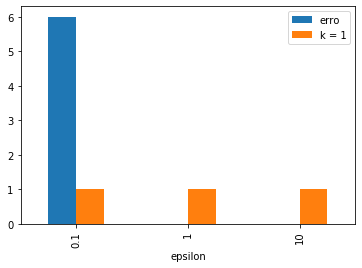

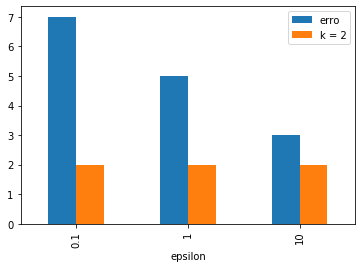

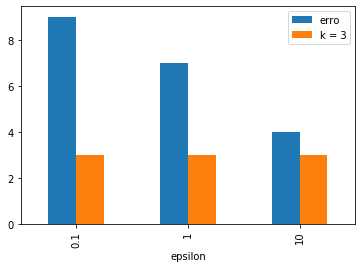

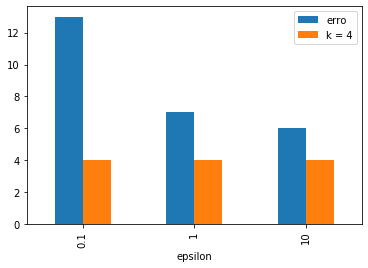

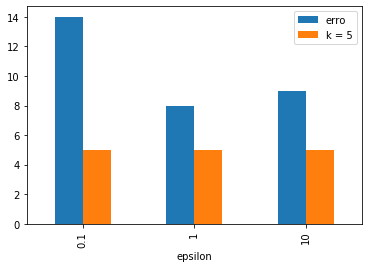

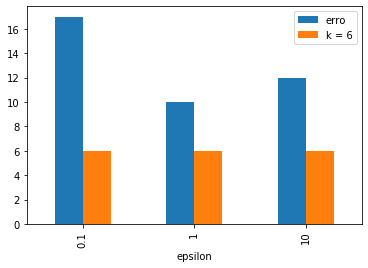

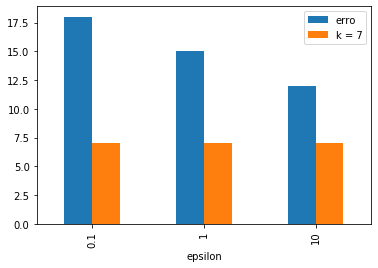

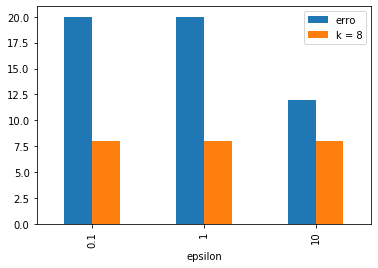

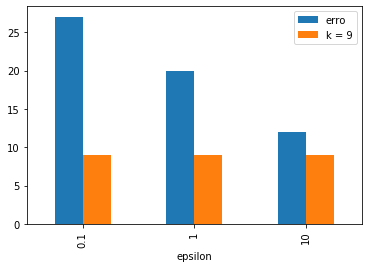

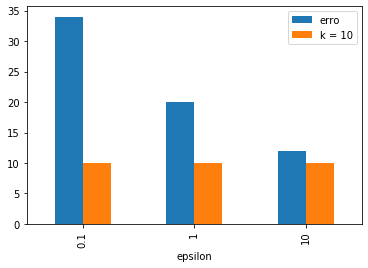

In [384]:
for i in range(0, k):
    plot_erros(aux[i], i+1)

### Consulta Idade com ruído

In [122]:
def laplace_idade(budget, sensibilidade, query, dataset, k):
    resposta_query = np.array(query['count'])
    coluna_idades = np.array(query['idade'])
    output = []
    np.random.seed(123)
    for i in range(k):
        ruido = stats.laplace.rvs(loc = 0, scale = sensibilidade/budget)
        output.append((resposta_query[i] + ruido))
    output = {
        'idade': coluna_idades,
        'count': output
    }
    
    df = pd.DataFrame(output, columns = ['idade', 'count'])
    return df.sort_values(by=['count'],ascending=False)

In [131]:
budgets = [0.1, 1, 10]
idades = []
k = 10
for budget in budgets:
    a = laplace_idade(budget, sensibilidade_lap(dataset_idade), top_k_idade(dataset_idade, 10), dataset_idade, 10)
    a = np.array(a)
    print("epsilon: {}\ntop-k:\n{}\n\n".format(budget, a))
    idades.append(a[:,0])

epsilon: 0.1
top-k:
[['[21:25]' 38.57834888254776]
 ['[36:40]' 20.9912496292116]
 ['[61:65]' 13.779237549274969]
 ['[51:55]' 10.614950931917797]
 ['[41:45]' 9.08286501254742]
 ['[26:30]' 8.418707789026971]
 ['[46:50]' 5.330157277395263]
 ['[76:80]' 4.6111758470501565]
 ['[31:35]' 3.0968731526788345]
 ['[71:75]' 1.5695348775144327]]


epsilon: 1
top-k:
[['[36:40]' 16.49912496292116]
 ['[26:30]' 13.441870778902697]
 ['[31:35]' 10.209687315267884]
 ['[21:25]' 9.257834888254775]
 ['[61:65]' 8.577923754927497]
 ['[41:45]' 8.108286501254742]
 ['[46:50]' 6.833015727739526]
 ['[51:55]' 6.46149509319178]
 ['[76:80]' 4.961117584705016]
 ['[71:75]' 3.7569534877514434]]


epsilon: 10
top-k:
[['[36:40]' 16.049912496292116]
 ['[26:30]' 13.94418707789027]
 ['[31:35]' 10.920968731526788]
 ['[61:65]' 8.057792375492749]
 ['[41:45]' 8.010828650125474]
 ['[46:50]' 6.983301572773953]
 ['[21:25]' 6.325783488825477]
 ['[51:55]' 6.046149509319178]
 ['[76:80]' 4.9961117584705015]
 ['[71:75]' 3.9756953487751443

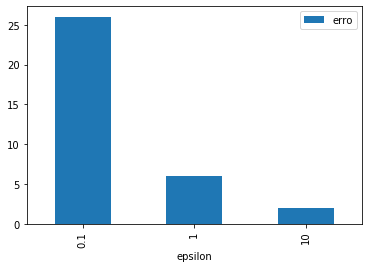

In [153]:
query_idades = top_k_idade(dataset_idade, 10)['idade']
erros_laplace_idades = erros_lap(query_idades, idades, 10)
plot_erros(erros_laplace_idades)

# Mecanismo Exponencial

In [154]:
def score_function_exp(registro, saida):
    if(registro[0] == saida):
        return registro[1]
    else:
        return 0

In [155]:
def sensibilidade_exp(dataset):
    return 1

In [156]:
def erros_exp(query, argumento_consulta, k):
    erros_exponencial = []
    top = list(query)
    for argumento in argumento_consulta:
        erro_argumento_exp = [0]*10
        for i in range(len(argumento)):
            if(argumento[i] in top):
                if(argumento[i] == top[i]):
                    erro = 0
                else:
                    erro = abs(top.index(argumento[i]) - i)
            else:
                erro = 100
            erro_argumento_exp[i]  = erro
        erros_exponencial.append(sum(erro_argumento_exp))
    return erros_exponencial

### Consulta Bairros Randomizada
